In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas_profiling as pp

from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.feature_selection import SelectKBest, f_classif 
from sklearn.model_selection import cross_val_score

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

In [7]:
df = pd.read_csv('.\\training.csv', index_col='Client')
df

,viable_candidate,Top_Value,Catagory_Label,Sale_MF,Sale_CC,Sale_CL,Revenue_MF,Revenue_CC,Revenue_CL,Sex,Age,Tenure,Count_CA,Count_SA,Count_MF,Count_OVD,Count_CC,Count_CL,ActBal_CA,ActBal_SA,ActBal_MF,ActBal_OVD,ActBal_CC,ActBal_CL,VolumeCred,VolumeCred_CA,TransactionsCred,TransactionsCred_CA,VolumeDeb,VolumeDeb_CA,VolumeDebCash_Card,VolumeDebCashless_Card,VolumeDeb_PaymentOrder,TransactionsDeb,TransactionsDeb_CA,TransactionsDebCash_Card,TransactionsDebCashless_Card,TransactionsDeb_PaymentOrder,Has_ActBal_CA,Has_ActBal_SA,Has_ActBal_MF,Has_ActBal_OVD,Has_ActBal_CC,Has_ActBal_CL,Has_VolumeCred,Has_VolumeCred_CA,Has_TransactionsCred,Has_TransactionsCred_CA,Has_VolumeDeb,Has_VolumeDeb_CA,Has_VolumeDebCash_Card,Has_VolumeDebCashless_Card,Has_VolumeDeb_PaymentOrder,Has_TransactionsDeb,Has_TransactionsDeb_CA,Has_TransactionsDebCash_Card,Has_TransactionsDebCashless_Card,Has_TransactionsDeb_PaymentOrder,VolumeCred_bin,binned_ActBal_CA,binned_VolumeCred,binned_VolumeCred_CA,binned_TransactionsCred,binned_TransactionsCred_CA,binned_VolumeDeb,binned_VolumeDeb_CA,binned_VolumeDebCash_Card,binned_VolumeDebCashless_Card,binned_VolumeDeb_PaymentOrder,binned_TransactionsDeb,binned_TransactionsDeb_CA,binned_TransactionsDebCash_Card,binned_TransactionsDebCashless_Card,binned_TransactionsDeb_PaymentOrder
Client,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1094,1.0,5.138571,2,0,1,0,0.000000,5.138571,0.000000,0,25,8,1,0.0,0.0,0.0,0.0,0.0,89.022500,0.000000,0.0,0.0,0.000000,0.0,0.011786,0.011786,1.0,1.0,1366.313929,1366.313929,53.571429,351.950357,891.327857,31.0,31.0,1.0,21.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1,1,1,1,1,3,3,1,2,3,1,1,1,1,1
1484,1.0,25.609107,3,1,0,1,25.609107,0.000000,8.722500,0,39,0,1,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,1355.088571,1355.088571,5.0,5.0,768.625000,768.625000,107.142857,302.446429,357.785714,23.0,23.0,1.0,16.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3,1,3,3,1,1,3,3,1,2,2,1,1,1,1,1
20,1.0,3.822500,2,0,1,0,0.000000,3.822500,0.000000,0,27,181,1,1.0,0.0,0.0,0.0,0.0,2194.472143,18302.062500,0.0,0.0,0.000000,0.0,452.617500,451.550000,4.0,3.0,221.428571,221.428571,107.142857,10.714286,103.571429,7.0,7.0,3.0,1.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2,4,2,2,1,1,2,2,1,1,1,1,1,1,1,1
1193,0.0,0.000000,0,0,0,0,0.000000,0.000000,0.000000,0,48,16,2,0.0,0.0,1.0,0.0,0.0,4180.697500,0.000000,0.0,0.0,0.000000,0.0,1442.837857,1151.652857,23.0,21.0,1661.201071,1207.906429,507.142857,331.150000,75.178571,55.0,36.0,6.0,21.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4,4,4,3,1,1,4,3,2,2,1,1,1,1,1,1
142,0.0,0.000000,0,0,0,0,0.000000,0.000000,0.000000,1,27,183,1,0.0,0.0,0.0,0.0,0.0,1511.683929,0.000000,0.0,0.0,0.000000,0.0,714.285714,714.285714,1.0,1.0,728.107143,728.107143,0.000000,0.000000,725.928571,2.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,3,4,3,3,1,1,3,3,1,1,3,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1316,1.0,3.317500,3,0,0,1,0.000000,0.000000,3.317500,1,63,158,1,1.0,0.0,1.0,1.0,0.0,2145.810000,5861.004643,0.0,0.0,43.321429,0.0,2713.495000,2665.039286,4.0,2.0,2985.423571,2874.767857,400.000000,507.816429,2029.250000,41.0,39.0,4.0,26.0,10.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4,4,4,4,1,1,4,4,2,2,4,1,1,1,1,1
905,1.0,13.166786,3,1,1,1,1.761071,0.892857,13.166786,0,37,11,1,0.0,0.0,0.0,0.0,0.0,4899.048214,0.000000,0.0,0.0,0.000000,0.0,573.861071,573.861071,2.0,2.0,634.845357,634.845357,0.000000,0.000000,631.452500,2.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.

In [54]:
print(df.columns[:9])
print(df.columns[9:18].values)
print(df.columns[38:].values)


Index(['viable_candidate', 'Top_Value', 'Catagory_Label', 'Sale_MF', 'Sale_CC',
       'Sale_CL', 'Revenue_MF', 'Revenue_CC', 'Revenue_CL'],
      dtype='object')
['Sex' 'Age' 'Tenure' 'Count_CA' 'Count_SA' 'Count_MF' 'Count_OVD'
 'Count_CC' 'Count_CL']
['Has_ActBal_CA' 'Has_ActBal_SA' 'Has_ActBal_MF' 'Has_ActBal_OVD'
 'Has_ActBal_CC' 'Has_ActBal_CL' 'Has_VolumeCred' 'Has_VolumeCred_CA'
 'Has_TransactionsCred' 'Has_TransactionsCred_CA' 'Has_VolumeDeb'
 'Has_VolumeDeb_CA' 'Has_VolumeDebCash_Card' 'Has_VolumeDebCashless_Card'
 'Has_VolumeDeb_PaymentOrder' 'Has_TransactionsDeb'
 'Has_TransactionsDeb_CA' 'Has_TransactionsDebCash_Card'
 'Has_TransactionsDebCashless_Card' 'Has_TransactionsDeb_PaymentOrder'
 'VolumeCred_bin' 'binned_ActBal_CA' 'binned_VolumeCred'
 'binned_VolumeCred_CA' 'binned_TransactionsCred'
 'binned_TransactionsCred_CA' 'binned_VolumeDeb' 'binned_VolumeDeb_CA'
 'binned_VolumeDebCash_Card' 'binned_VolumeDebCashless_Card'
 'binned_VolumeDeb_PaymentOrder' 'binned_Transactio

In [55]:
cols_to_train_with = ['viable_candidate', 'Top_Value', 'Catagory_Label', 'Sale_MF', 'Sale_CC',
'Sale_CL', 'Revenue_MF', 'Revenue_CC', 'Revenue_CL','Sex', 'Age', 'Tenure', 'Count_CA', 'Count_SA', 'Count_MF', 'Count_OVD',
 'Count_CC', 'Count_CL','Has_ActBal_CA', 'Has_ActBal_SA', 'Has_ActBal_MF', 'Has_ActBal_OVD',
 'Has_ActBal_CC', 'Has_ActBal_CL', 'Has_VolumeCred', 'Has_VolumeCred_CA',
 'Has_TransactionsCred', 'Has_TransactionsCred_CA', 'Has_VolumeDeb',
 'Has_VolumeDeb_CA', 'Has_VolumeDebCash_Card', 'Has_VolumeDebCashless_Card',
 'Has_VolumeDeb_PaymentOrder', 'Has_TransactionsDeb',
 'Has_TransactionsDeb_CA', 'Has_TransactionsDebCash_Card',
 'Has_TransactionsDebCashless_Card', 'Has_TransactionsDeb_PaymentOrder',
 'VolumeCred_bin', 'binned_ActBal_CA', 'binned_VolumeCred',
 'binned_VolumeCred_CA', 'binned_TransactionsCred',
 'binned_TransactionsCred_CA', 'binned_VolumeDeb', 'binned_VolumeDeb_CA',
 'binned_VolumeDebCash_Card', 'binned_VolumeDebCashless_Card',
 'binned_VolumeDeb_PaymentOrder', 'binned_TransactionsDeb',
 'binned_TransactionsDeb_CA', 'binned_TransactionsDebCash_Card',
 'binned_TransactionsDebCashless_Card',
 'binned_TransactionsDeb_PaymentOrder']

In [56]:
df[cols_to_train_with].to_csv('.\\simplifid_data.csv')

In [62]:
X = df[cols_to_train_with]
X

,viable_candidate,Top_Value,Catagory_Label,Sale_MF,Sale_CC,Sale_CL,Revenue_MF,Revenue_CC,Revenue_CL,Sex,Age,Tenure,Count_CA,Count_SA,Count_MF,Count_OVD,Count_CC,Count_CL,Has_ActBal_CA,Has_ActBal_SA,Has_ActBal_MF,Has_ActBal_OVD,Has_ActBal_CC,Has_ActBal_CL,Has_VolumeCred,Has_VolumeCred_CA,Has_TransactionsCred,Has_TransactionsCred_CA,Has_VolumeDeb,Has_VolumeDeb_CA,Has_VolumeDebCash_Card,Has_VolumeDebCashless_Card,Has_VolumeDeb_PaymentOrder,Has_TransactionsDeb,Has_TransactionsDeb_CA,Has_TransactionsDebCash_Card,Has_TransactionsDebCashless_Card,Has_TransactionsDeb_PaymentOrder,VolumeCred_bin,binned_ActBal_CA,binned_VolumeCred,binned_VolumeCred_CA,binned_TransactionsCred,binned_TransactionsCred_CA,binned_VolumeDeb,binned_VolumeDeb_CA,binned_VolumeDebCash_Card,binned_VolumeDebCashless_Card,binned_VolumeDeb_PaymentOrder,binned_TransactionsDeb,binned_TransactionsDeb_CA,binned_TransactionsDebCash_Card,binned_TransactionsDebCashless_Card,binned_TransactionsDeb_PaymentOrder
Client,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1094,1.0,5.138571,2,0,1,0,0.000000,5.138571,0.000000,0,25,8,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1,1,1,1,1,3,3,1,2,3,1,1,1,1,1
1484,1.0,25.609107,3,1,0,1,25.609107,0.000000,8.722500,0,39,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3,1,3,3,1,1,3,3,1,2,2,1,1,1,1,1
20,1.0,3.822500,2,0,1,0,0.000000,3.822500,0.000000,0,27,181,1,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2,4,2,2,1,1,2,2,1,1,1,1,1,1,1,1
1193,0.0,0.000000,0,0,0,0,0.000000,0.000000,0.000000,0,48,16,2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4,4,4,3,1,1,4,3,2,2,1,1,1,1,1,1
142,0.0,0.000000,0,0,0,0,0.000000,0.000000,0.000000,1,27,183,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,3,4,3,3,1,1,3,3,1,1,3,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1316,1.0,3.317500,3,0,0,1,0.000000,0.000000,3.317500,1,63,158,1,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4,4,4,4,1,1,4,4,2,2,4,1,1,1,1,1
905,1.0,13.166786,3,1,1,1,1.761071,0.892857,13.166786,0,37,11,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,2,4,2,2,1,1,2,2,1,1,2,1,1,1,1,1
938,1.0,7.812143,3,0,1,1,0.000000,4.928571,7.812143,0,57,33,1,1.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2,1,2,2,1,1,2,2,1,2,1,1,1,1,1,1


In [39]:
y = df['viable_candidate']

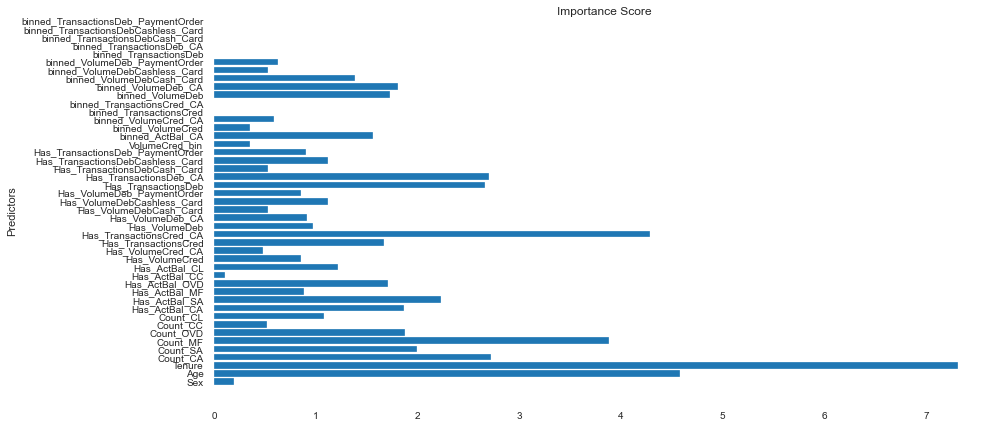

In [43]:
# Best features

predictors = X.columns
# Perform feature selection where `k` (5 in this case) indicates the number of features we wish to select
selector = SelectKBest(f_classif, k=10)
selector.fit(X[predictors], y)
importance_score = -np.log(selector.pvalues_)

# Plot each column with their importance score
plt.rcParams["figure.figsize"] = [14,7]
plt.barh(range(len(predictors)), importance_score, color='C0')
plt.ylabel("Predictors")
plt.title("Importance Score")
plt.yticks(range(len(predictors)), predictors)

plt.show()

In [41]:
best_features = pd.DataFrame({'features': predictors, 'scores': importance_score})
# Best 8 features
best_features.sort_values('scores', ascending = False).head(8)

,features,scores
2,Tenure,7.317292
1,Age,4.583340
18,Has_TransactionsCred_CA,4.286589
5,Count_MF,3.888289
3,Count_CA,2.723263
25,Has_TransactionsDeb_CA,2.702176
24,Has_TransactionsDeb,2.660354
10,Has_ActBal_SA,2.236020


In [44]:
b_features = best_features.sort_values('scores', ascending = False).head(10).features
b_features

2                      Tenure
1                         Age
18    Has_TransactionsCred_CA
5                    Count_MF
3                    Count_CA
25     Has_TransactionsDeb_CA
24        Has_TransactionsDeb
10              Has_ActBal_SA
4                    Count_SA
6                   Count_OVD
Name: features, dtype: object

In [ ]:
df[b_features]

In [48]:
names = ["Nearest Neighbors", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    GaussianProcessClassifier(1.0 * RBF(1.0), random_state=0),
    DecisionTreeClassifier(max_depth=5, random_state=0),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1, random_state=0),
    MLPClassifier(alpha=1, max_iter=2000, random_state=0),
    GaussianNB()]



In [49]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=0)

In [50]:
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print(name, score)

Nearest Neighbors 0.5308641975308642
Gaussian Process 0.5720164609053497
Decision Tree 0.5637860082304527
Random Forest 0.5761316872427984
Neural Net 0.551440329218107
Naive Bayes 0.5308641975308642


In [57]:
y = df['Catagory_Label']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=0)
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print(name, score)

Nearest Neighbors 0.35802469135802467
Gaussian Process 0.5020576131687243
Decision Tree 0.4444444444444444
Random Forest 0.4444444444444444
Neural Net 0.4567901234567901
Naive Bayes 0.1728395061728395


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X[b_features], y, random_state=0)

In [ ]:
X_train

In [ ]:
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print(name, score)

In [ ]:
X_test

In [58]:
clf = GradientBoostingClassifier(random_state=0)
clf.fit(X_train, y_train)

train_acc_cv = cross_val_score(clf, X_train, y_train, cv=10)
print(train_acc_cv.mean())
print(clf.score(X_test, y_test))

0.3993911719939117
0.4403292181069959


In [59]:
from joblib import dump, load
dump(clf, 'model.joblib') 

['model.joblib']

In [60]:
clf = load('model.joblib')

In [61]:
clf.score(X_test, y_test)

0.4403292181069959

In [67]:
tree_model = DecisionTreeClassifier(max_depth=5, random_state=0),
tree_model = tree_model.fit(X_train, y_train)


AttributeError: 'tuple' object has no attribute 'fit'

, 3, 0]'),
 Text(534.3570684821786, 107.53826086956519, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0, 0]'),
 Text(539.3627553063677, 107.53826086956519, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3, 0]'),
 Text(539.3627553063677, 140.62695652173912, 'gini = 0.0\nsamples = 3\nvalue = [3, 0, 0, 0]'),
 Text(546.8712855426512, 157.1713043478261, 'X[2] <= 50.0\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1, 0]'),
 Text(544.3684421305567, 140.62695652173912, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0, 0]'),
 Text(549.3741289547457, 140.62695652173912, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0]'),
 Text(535.6084901882259, 190.26, 'gini = 0.0\nsamples = 7\nvalue = [7, 0, 0, 0]'),
 Text(546.8712855426512, 206.80434782608694, 'X[2] <= 90.0\ngini = 0.42\nsamples = 10\nvalue = [3, 0, 7, 0]'),
 Text(544.3684421305567, 190.26, 'gini = 0.0\nsamples = 5\nvalue = [0, 0, 5, 0]'),
 Text(549.3741289547457, 190.26, 'X[30] <= 3.0\ngini = 0.48\nsamples = 5\nvalue = [3, 0, 2, 0]'),
 Text(546.8712855426512, 173.

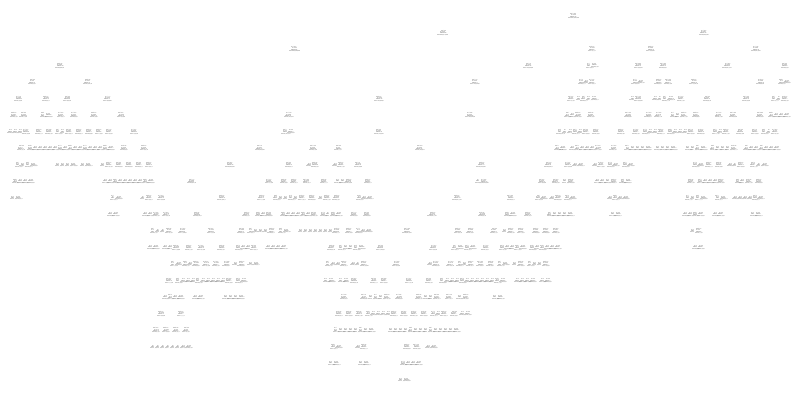

In [69]:
from sklearn.datasets import load_iris
from sklearn import tree
clf1 = tree.DecisionTreeClassifier(random_state=0)
clf1 = clf1.fit(X_train, y_train)
tree.plot_tree(clf1)